# U.S. Fish & Wildlife Service

### Data Gathering

In [203]:
import pandas as pd

In [204]:
# All plants and animals (9612 records, 15 columns)
species = pd.read_html('../Data/fws.html', header=0)[0]
print(species.shape)
species.head()

(9612, 15)


,Scientific Name,Common Name,Inverted Common Name,Species Code,Population Code,CurrentDistribution,Family,First Listed,Species Group,Lead Region,Federal Listing Status,Regions ofOccurrence,U.S. or ForeignListed,Vertebrate/Invertebrate/Plant,Where Listed
0,Abies fraseri,Fraser fir,"Fir, Fraser",R00B,P01,"NC, VA;",Pinaceae,NaN,Conifers and Cycads,4,Not Listed,"4, 5",US,P,Wherever found
1,Abies guatemalensis,Guatemalan Fir (=pinabete),"Fir, Guatemalan (=pinabete)",R003,P01,"Mexico, Honduras, Guatemala, El Salvador",Pinaceae,"Dec 10, 1979",Conifers and Cycads,Foreign,Threatened,NaN,Foreign,P,Wherever found
2,Ablautus schlingeri,Oso Flaco robber fly,"Robber fly, Oso Flaco",I0O3,I01,CA;,Asilidae,NaN,Insects,1,Not Listed,8,US,I,Wherever found
3,Abronia alpina,Ramshaw Meadows sand-verbena,"Sand-verbena, Ramshaw Meadows",Q009,P01,CA;,Nyctaginaceae,NaN,Flowering Plants,8,Not Listed,8,US,P,Wherever found
4,Abronia ammophila,Yellowstone Sand Verbena,Verbena Yellowstone Sand,Q3LO,P01,NaN,Nyctaginaceae,NaN,Flowering Plants,6,Not Listed,NaN,US,P,Wherever found


### Feature Selection

In [205]:
# print unique values in each column
for column in species.columns:
    print(column + ': ' + str(len(species[column].unique())))

Scientific Name: 9318
Common Name: 7129
Inverted Common Name: 7108
Species Code: 9430
Population Code: 20
CurrentDistribution: 1678
Family: 900
First Listed: 638
Species Group: 20
Lead Region: 12
Federal Listing Status: 19
Regions ofOccurrence: 58
U.S. or ForeignListed: 4
Vertebrate/Invertebrate/Plant: 3
Where Listed: 322


In [206]:
# drop uninformative columns
species = species.drop(['Inverted Common Name',
                        'Species Code',
                        'Population Code',
                        'Family',
                        'First Listed',
                        'Regions ofOccurrence',
                        'U.S. or ForeignListed',
                        'Where Listed'], axis=1)

In [207]:
print(species.shape)
species.head()

(9612, 7)


,Scientific Name,Common Name,CurrentDistribution,Species Group,Lead Region,Federal Listing Status,Vertebrate/Invertebrate/Plant
0,Abies fraseri,Fraser fir,"NC, VA;",Conifers and Cycads,4,Not Listed,P
1,Abies guatemalensis,Guatemalan Fir (=pinabete),"Mexico, Honduras, Guatemala, El Salvador",Conifers and Cycads,Foreign,Threatened,P
2,Ablautus schlingeri,Oso Flaco robber fly,CA;,Insects,1,Not Listed,I
3,Abronia alpina,Ramshaw Meadows sand-verbena,CA;,Flowering Plants,8,Not Listed,P
4,Abronia ammophila,Yellowstone Sand Verbena,NaN,Flowering Plants,6,Not Listed,P


### Missing Data

In [208]:
import missingno as msno

Scientific Name                    0
Common Name                        0
CurrentDistribution              860
Species Group                      0
Lead Region                       73
Federal Listing Status             0
Vertebrate/Invertebrate/Plant      0
dtype: int64


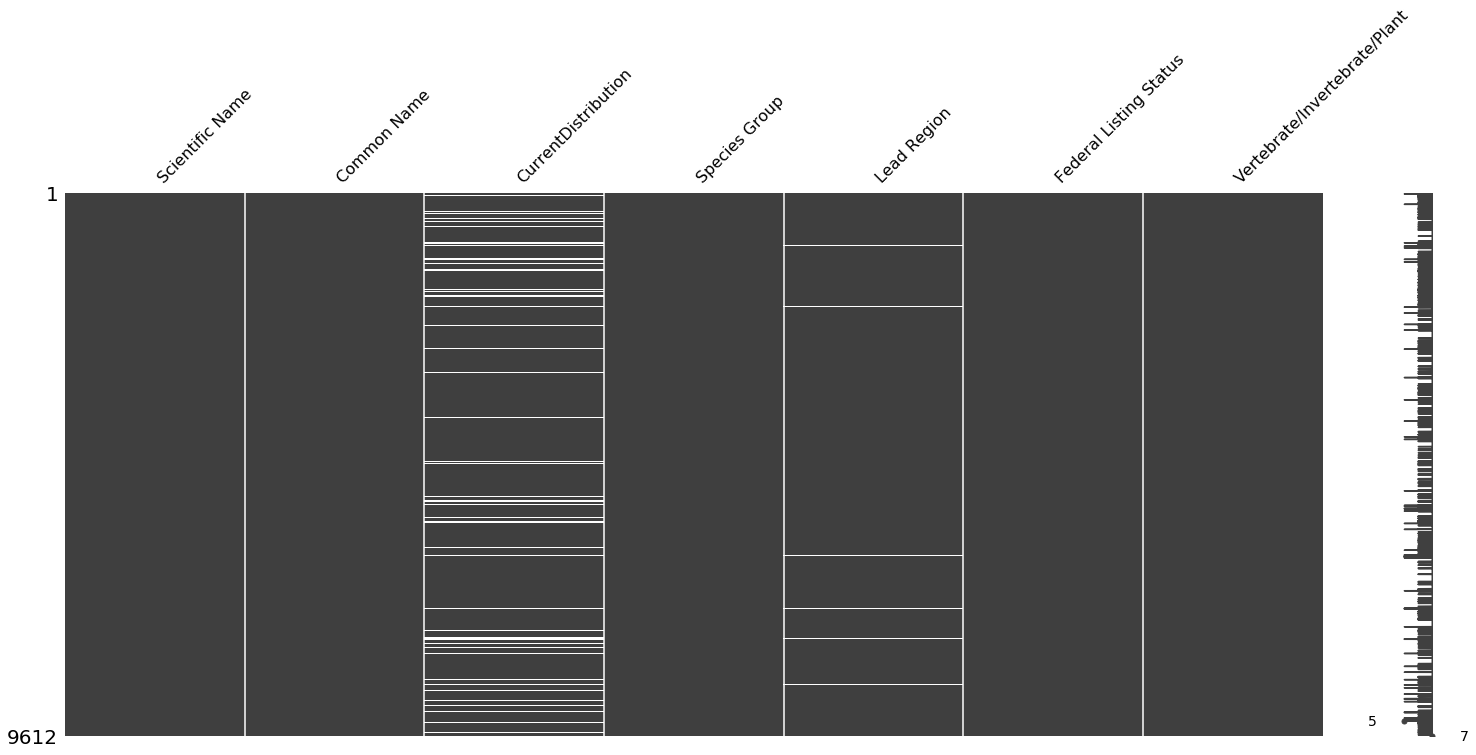

In [209]:
# check species data for null values
print(species.isnull().sum())

# visualize null values
msno.matrix(species)

In [210]:
# ~10% of records that do not have geographic information
print(species.isnull().sum().sum() / species.shape[0])

# drop records without geographic information
species = species.dropna()

0.0970661672908864


In [211]:
print(species.shape)
species.head()

(8751, 7)


,Scientific Name,Common Name,CurrentDistribution,Species Group,Lead Region,Federal Listing Status,Vertebrate/Invertebrate/Plant
0,Abies fraseri,Fraser fir,"NC, VA;",Conifers and Cycads,4,Not Listed,P
1,Abies guatemalensis,Guatemalan Fir (=pinabete),"Mexico, Honduras, Guatemala, El Salvador",Conifers and Cycads,Foreign,Threatened,P
2,Ablautus schlingeri,Oso Flaco robber fly,CA;,Insects,1,Not Listed,I
3,Abronia alpina,Ramshaw Meadows sand-verbena,CA;,Flowering Plants,8,Not Listed,P
6,Abronia ammphila,[Unnamed] sand-verbena,WY;,Flowering Plants,6,Not Listed,P


### Feature Cleaning

In [212]:
# unique species groups
species.groupby('Species Group')['Species Group'].count()

Species Group
Amphibians                   138
Annelid Worms                  2
Arachnids                     50
Birds                        475
Clams                        203
Conifers and Cycads           22
Corals                         3
Crustaceans                  230
Ferns and Allies              95
Fishes                       429
Flatworms and Roundworms       8
Flowering Plants            4584
Hydroids                       1
Insects                     1063
Lichens                       17
Mammals                      660
Millipedes                     1
Reptiles                     257
Snails                       506
Sponges                        7
Name: Species Group, dtype: int64

In [213]:
# unique species types
species.groupby('Vertebrate/Invertebrate/Plant')['Vertebrate/Invertebrate/Plant'].count()

Vertebrate/Invertebrate/Plant
I    2074
P    4718
V    1959
Name: Vertebrate/Invertebrate/Plant, dtype: int64

In [214]:
# unique current distribution
print(species.groupby('Lead Region')['Lead Region'].count())

# drop species in foreign geographic regions
species = species[species['Lead Region'] != 'Foreign']

# drop species in geographic region 9 (not documented)
species = species[species['Lead Region'] != '9']

Lead Region
1          3531
2           989
3           211
4          1804
5           355
6           615
7            76
8           480
9             1
Foreign     624
NMFS         65
Name: Lead Region, dtype: int64


In [215]:
# list of US states
state_abbrevs = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA',
                 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD',
                 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ',
                 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC',
                 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

# stack records with multiple US states in current distribution
species_stack = pd.DataFrame(columns=species.columns)

for abbrev in state_abbrevs:
    state = species[species['CurrentDistribution'].str.contains(abbrev)]
    state = state.assign(StateDistribution=abbrev)
    species_stack = species_stack.append(state, ignore_index=True)
    
# drop current distribution
species = species_stack.drop(['CurrentDistribution'], axis=1)

In [216]:
# unique federal listing status
print(species.groupby('Federal Listing Status')['Federal Listing Status'].count())

# keep records for endangered, not listed and threatened species
species = species[(species['Federal Listing Status'] == 'Endangered') |
                  (species['Federal Listing Status'] == 'Not Listed') |
                  (species['Federal Listing Status'] == 'Threatened')]

Federal Listing Status
Candidate                                                    34
Endangered                                                 1901
Experimental Population, Non-Essential                      260
Extinction                                                   17
Not Listed                                                 9074
Original Data in Error - Act Amendment                        1
Original Data in Error - New Information Discovered           9
Original Data in Error - Not a listable entity                7
Original Data in Error - Taxonomic Revision                   9
Proposed Endangered                                           3
Proposed Similarity of Appearance to a Threatened Taxon       1
Proposed Threatened                                          62
Recovery                                                     83
Similarity of Appearance to a Threatened Taxon               40
Threatened                                                  817
Under Review in t

In [221]:
print(species.shape)
species.head()

(11792, 7)


,Common Name,Federal Listing Status,Lead Region,Scientific Name,Species Group,StateDistribution,Vertebrate/Invertebrate/Plant
0,Northern goshawk,Not Listed,2,Accipiter gentilis,Birds,AL,V
1,Lake sturgeon,Not Listed,3,Acipenser fulvescens,Fishes,AL,V
2,Atlantic sturgeon (Gulf subspecies),Threatened,4,Acipenser oxyrinchus (=oxyrhynchus) desotoi,Fishes,AL,V
3,[Unnamed] caddisfly,Not Listed,4,Agarodes alabamensis,Insects,AL,I
4,Incised groovebur,Not Listed,4,Agrimonia incisa,Flowering Plants,AL,P


# Exploratory Data Analysis

# Feature Engineering

# Data Scaling

# Class Imbalance

# Model Fitting

# Model Evaluation